In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [3]:
dados = pd.read_csv('projeto4_telecom_teste.csv')

In [4]:
dados.shape

(1667, 21)

In [5]:
dados.columns

Index(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
dados.sample(10)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1137,1138,KS,121,area_code_408,yes,no,0,175.9,87,29.90,...,114,19.15,156.2,113,7.03,10.4,3,2.81,2,no
1595,1596,PA,121,area_code_408,no,no,0,245.9,113,41.80,...,94,17.92,187.9,108,8.46,10.4,8,2.81,1,no
19,20,HI,158,area_code_510,no,no,0,193.3,121,32.86,...,97,17.69,228.1,99,10.26,7.1,9,1.92,1,no
261,262,FL,89,area_code_510,no,no,0,215.9,106,36.70,...,89,17.94,252.9,106,11.38,8.8,4,2.38,0,no
1143,1144,KS,70,area_code_415,no,no,0,325.5,128,55.34,...,105,25.53,199.8,93,8.99,5.7,7,1.54,1,yes
452,453,NJ,126,area_code_415,no,no,0,167.1,138,28.41,...,93,13.12,244.5,148,11.00,13.7,10,3.70,3,no
1278,1279,HI,90,area_code_408,no,no,0,193.8,90,32.95,...,98,17.56,153.3,120,6.90,10.1,9,2.73,3,no
294,295,ID,45,area_code_510,yes,yes,40,179.0,114,30.43,...,99,23.17,67.1,80,3.02,10.8,3,2.92,3,no
177,178,ID,139,area_code_408,no,no,0,187.4,86,31.86,...,116,14.39,153.4,88,6.90,11.7,3,3.16,1,no
1314,1315,SC,98,area_code_415,no,no,0,147.0,101,24.99,...,89,17.21,250.8,97,11.29,9.2,3,2.48,1,no


In [7]:
dados.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [8]:
# Removendo a coluna que indicava index
dados.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
# Variáveis categóricas
dados.dtypes[dados.dtypes == 'object']

state                 object
area_code             object
international_plan    object
voice_mail_plan       object
churn                 object
dtype: object

In [10]:
# Variáveis não categóricas
dados.dtypes[dados.dtypes != 'object']

account_length                     int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [11]:
dados.describe()
#Verifico que a maioria das variaveis náo categóricas tem uma mediana próxima da média, indicando distribuições normais

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,98.646671,7.067786,181.316197,99.217157,30.824337,199.949190,100.344331,16.995903,199.431074,99.542292,8.974559,10.310738,4.346731,2.784421,1.585483
std,39.400755,13.235274,52.732174,19.327148,8.964421,50.232869,19.637935,4.269758,50.437010,20.717441,2.269604,2.699660,2.446252,0.728764,1.288179
min,1.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,0.000000,143.750000,86.000000,24.440000,165.900000,88.000000,14.100000,166.600000,86.000000,7.500000,8.600000,3.000000,2.320000,1.000000
50%,98.000000,0.000000,181.000000,99.000000,30.770000,200.400000,100.000000,17.030000,199.400000,99.000000,8.970000,10.400000,4.000000,2.810000,1.000000
75%,126.000000,0.000000,215.750000,112.000000,36.680000,232.300000,113.000000,19.745000,233.050000,113.000000,10.490000,12.000000,5.000000,3.240000,2.000000
max,238.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.000000


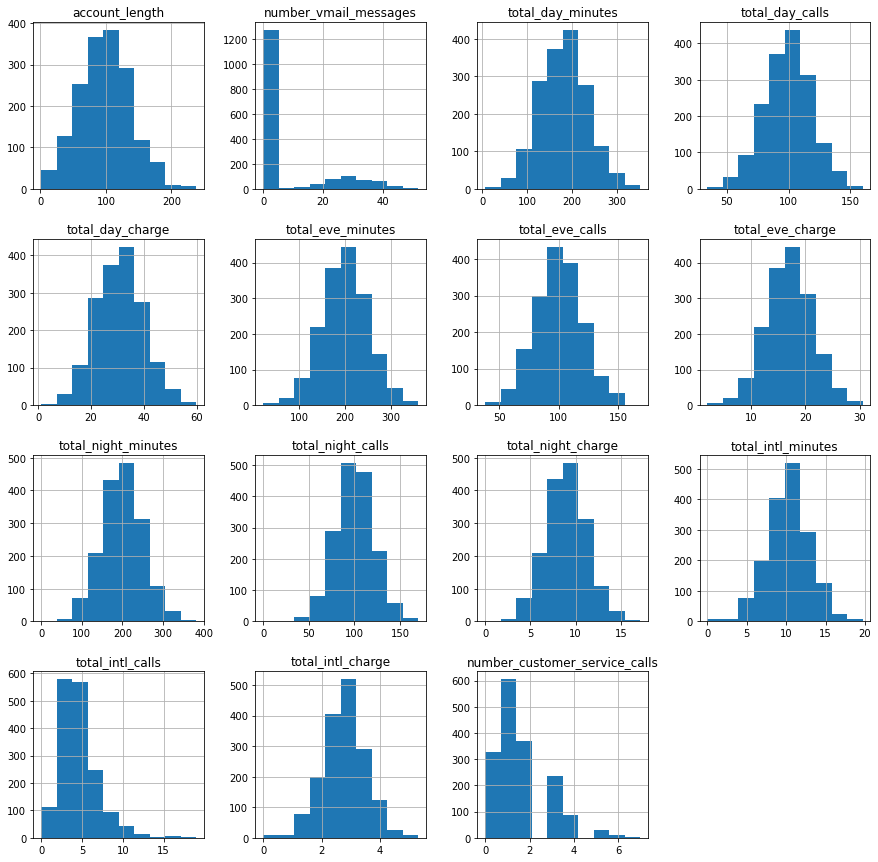

In [12]:
# Plot 
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

In [13]:
dados.describe(include = ['object'])

,state,area_code,international_plan,voice_mail_plan,churn
count,1667,1667,1667,1667,1667
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,52,840,1517,1266,1443


In [14]:
# Verificando valores ausentes
dados[dados.isnull().values]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [15]:
# Verificando registros duplicados (complete cases)
# Complete cases também se refere a linhas onde não há valores ausentes
dados[dados.duplicated(keep = False)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


Não há valores duplicados ou ausentes.

In [16]:
# Ajustar a variáveis para poder verificar a correlação
def ajusta_var(x):
    if x == "yes":
        return 1
    return 0
dados['churn'] = dados['churn'].map(ajusta_var)
dados['international_plan'] = dados['international_plan'].map(ajusta_var)
dados['voice_mail_plan'] = dados['voice_mail_plan'].map(ajusta_var)
dados.rename({'churn':'Target'}, axis = 'columns', inplace = True)
# Correlação entre as variáveis
dados.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Target
account_length,1.000000,-0.007291,-0.030369,-0.038609,-0.014926,0.004267,-0.014927,-0.016229,-0.011114,-0.016241,0.019004,0.001250,0.018979,-0.014783,-0.000895,-0.014848,0.004126,0.029702
international_plan,-0.007291,1.000000,0.014308,0.017560,-0.016771,0.016430,-0.016765,0.025369,-0.004875,0.025354,-0.022021,-0.008132,-0.022012,0.002167,-0.023153,0.002207,0.011684,0.257202
voice_mail_plan,-0.030369,0.014308,1.000000,0.949129,0.011802,0.015031,0.011794,0.026008,-0.004152,0.025993,0.002771,-0.004910,0.002797,0.017418,-0.042491,0.017487,-0.006298,-0.131207
number_vmail_messages,-0.038609,0.017560,0.949129,1.000000,0.016747,0.020015,0.016739,0.022495,0.000654,0.022480,-0.000367,-0.007417,-0.000348,0.003040,-0.031483,0.003116,0.006860,-0.116343
total_day_minutes,-0.014926,-0.016771,0.011802,0.016747,1.000000,-0.007162,1.000000,-0.047466,-0.008110,-0.047467,0.027850,-0.031778,0.027848,-0.039961,-0.019653,-0.039876,0.036474,0.213878
total_day_calls,0.004267,0.016430,0.015031,0.020015,-0.007162,1.000000,-0.007165,0.041946,-0.001453,0.041955,-0.040317,0.012572,-0.040303,-0.003924,0.021843,-0.003942,0.007379,0.009864
total_day_charge,-0.014927,-0.016765,0.011794,0.016739,1.000000,-0.007165,1.000000,-0.047471,-0.008107,-0.047473,0.027858,-0.031781,0.027856,-0.039969,-0.019660,-0.039884,0.036462,0.213862
total_eve_minutes,-0.016229,0.025369,0.026008,0.022495,-0.047466,0.041946,-0.047471,1.000000,0.031997,1.000000,-0.025248,0.024199,-0.025238,0.023836,0.019533,0.023977,-0.015317,0.081612
total_eve_calls,-0.011114,-0.004875,-0.004152,0.000654,-0.008110,-0.001453,-0.008107,0.031997,1.000000,0.032029,0.009887,-0.054494,0.009867,-0.041585,-0.018205,-0.041681,0.013998,-0.038537
total_eve_charge,-0.016241,0.025354,0.025993,0.022480,-0.047467,0.041955,-0.047473,1.000000,0.032029,1.000000,-0.025261,0.024185,-0.025251,0.023838,0.019547,0.023979,-0.015350,0.081613


As variações das váriaveis que terminam com **_minutes** tem alta correlação com variações **_charge** e possuem correlações 
semelhantes referente a target.Terei de utilizar apenas 1 delas.
As variáveis de minutos, ligações e cobrnaça foram divididas por período do dia e internacional.
Suponho que a junção destas variáveis podem apresentar uma maior correlação com a target.

In [17]:
#Criando novas variaveis que somam os valores de minutos, ligacoes e cobranca da variaveis.
dados['total_minutes'] = dados['total_day_minutes'] + dados['total_eve_minutes'] +dados['total_night_minutes'] +dados['total_intl_minutes']
dados['total_calls'] = dados['total_day_calls'] + dados['total_eve_calls'] +dados['total_night_calls'] +dados['total_intl_calls']
dados['total_charge'] = dados['total_day_charge'] + dados['total_eve_charge'] +dados['total_night_charge'] +dados['total_intl_charge']

In [18]:
#Criando novas variaveis ponderadas com as correlacoes
dados['total_minutes_weighted'] = (dados['total_day_minutes']*0.213878) + (dados['total_eve_minutes']*0.081612) + (dados['total_night_minutes']*0.066204) + (dados['total_intl_minutes']*0.053308)
dados['total_calls_weighted'] = (dados['total_day_calls']*0.009864) + (dados['total_eve_calls']*-0.038537) + (dados['total_night_calls']*-0.033161) + (dados['total_intl_calls']*-0.035723)
dados['total_charge_weighted'] = (dados['total_day_charge']*0.213862) + (dados['total_eve_charge']*0.081613) + (dados['total_night_charge']*0.066187) + (dados['total_intl_charge']*0.053234)

A correlacao da variavel **total_charge** é maior que as outras variáveis criadas e originais, assim utilizarei apenas ela.

In [19]:
dados_featureSelection = dados.drop(dados.columns[[6,7,8,9,10,11,12,13,14,15,16,17,20,21,23,24,25]], axis=1)
dados.sample(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,number_customer_service_calls,Target,total_minutes,total_calls,total_charge,total_minutes_weighted,total_calls_weighted,total_charge_weighted
7,LA,94,area_code_408,0,0,0,157.5,97,26.78,224.5,...,6,3.00,0,0,703.9,321,62.85,73.175601,-7.088740,8.370059
1103,MA,102,area_code_510,0,0,0,143.7,82,24.43,170.9,...,1,2.65,2,0,635.3,278,55.60,65.787001,-6.139478,7.477512
1043,DC,149,area_code_415,0,1,25,185.6,109,31.55,167.3,...,3,2.89,1,1,535.2,301,56.38,65.280446,-5.777886,8.572693


In [20]:
dados_featureSelection.sample(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
701,ME,115,area_code_408,0,0,0,3,0,68.68
19,HI,158,area_code_510,0,0,0,1,0,62.73
392,NE,120,area_code_415,0,1,40,1,0,67.38


In [21]:
dados_featureSelection.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
account_length,1.000000,-0.007291,-0.030369,-0.038609,0.004126,0.029702,-0.017010
international_plan,-0.007291,1.000000,0.014308,0.017560,0.011684,0.257202,-0.008996
voice_mail_plan,-0.030369,0.014308,1.000000,0.949129,-0.006298,-0.131207,0.023469
number_vmail_messages,-0.038609,0.017560,0.949129,1.000000,0.006860,-0.116343,0.024635
number_customer_service_calls,0.004126,0.011684,-0.006298,0.006860,1.000000,0.221062,0.023211
Target,0.029702,0.257202,-0.131207,-0.116343,0.221062,1.000000,0.244305
total_charge,-0.017010,-0.008996,0.023469,0.024635,0.023211,0.244305,1.000000


In [22]:
dados_featureSelection.describe(include = ['object'])

,state,area_code
count,1667,1667
unique,51,3
top,WV,area_code_415
freq,52,840


In [23]:
#Ire transformar as variáveis categóricas restantes
dados_featureSelection["area_code"].unique()

array(['area_code_510', 'area_code_408', 'area_code_415'], dtype=object)

In [24]:
# Ajustar a variável area_code para poder verificar a correlação
def ajusta_area(x):
    if x != 'area_code_510':
        if x != 'area_code_408':
            return 415
        else:
            return 408
    return 510
dados_featureSelection['area_code'] = dados_featureSelection['area_code'].map(ajusta_area)
labelencoder = LabelEncoder()
dados_featureSelection['state'] = labelencoder.fit_transform(dados_featureSelection['state'])
dados_featureSelection

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
0,11,101,510,0,0,0,3,0,43.54
1,26,137,510,0,0,0,0,0,65.63
2,35,103,408,0,1,29,1,0,87.48
3,32,99,415,0,0,0,1,0,61.77
4,40,108,415,0,0,0,2,0,55.38
...,...,...,...,...,...,...,...,...,...
1662,11,50,408,0,1,40,2,0,75.09
1663,49,152,415,0,0,0,3,1,66.72
1664,7,61,415,0,0,0,1,0,51.82
1665,7,109,510,0,0,0,0,0,59.09


In [25]:
dados_featureSelection.corr()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
state,1.000000,0.023352,0.009726,0.032175,-0.027523,-0.026991,0.013527,0.004967,0.020336
account_length,0.023352,1.000000,-0.030304,-0.007291,-0.030369,-0.038609,0.004126,0.029702,-0.017010
area_code,0.009726,-0.030304,1.000000,-0.002574,-0.008887,-0.007354,0.007412,0.018196,-0.025129
international_plan,0.032175,-0.007291,-0.002574,1.000000,0.014308,0.017560,0.011684,0.257202,-0.008996
voice_mail_plan,-0.027523,-0.030369,-0.008887,0.014308,1.000000,0.949129,-0.006298,-0.131207,0.023469
number_vmail_messages,-0.026991,-0.038609,-0.007354,0.017560,0.949129,1.000000,0.006860,-0.116343,0.024635
number_customer_service_calls,0.013527,0.004126,0.007412,0.011684,-0.006298,0.006860,1.000000,0.221062,0.023211
Target,0.004967,0.029702,0.018196,0.257202,-0.131207,-0.116343,0.221062,1.000000,0.244305
total_charge,0.020336,-0.017010,-0.025129,-0.008996,0.023469,0.024635,0.023211,0.244305,1.000000


In [26]:
# Cria um objeto separado para a variável target
y = dados_featureSelection.Target
# Cria um objeto separadado para as variáveis de entrada
X = dados_featureSelection.drop('Target', axis = 1)
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados_featureSelection.Target)
#Verificando o balanceamento da Classe target
y_treino.value_counts()

0    1082
1     168
Name: Target, dtype: int64

In [27]:
#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X_treino, y_treino = over_sampler.fit_resample(X_treino, y_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

# Criação de modelos

### LogisticRegression

In [28]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}
# Criando o modelo com GridSearch 
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'accuracy', 
                         n_jobs = -1)
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=10)

In [29]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C = 100)
modelo_v1.fit(X_treino, y_treino)
# Obtemos os coeficientes pelo maior maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
voice_mail_plan
total_charge
number_vmail_messages
number_customer_service_calls
international_plan
account_length
state
area_code


In [30]:
# Previsões
y_pred_v1 = modelo_v1.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)
# Calcula AUC score
auc_v1 = auc(fpr_v1, tpr_v1)
# Calcula acurácia
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística',
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

### RandomForest

In [31]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=300)

In [32]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5)
modelo_v2.fit(X_treino, y_treino)
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
total_charge
account_length
state
number_customer_service_calls
area_code
number_vmail_messages
voice_mail_plan
international_plan


In [33]:
# Previsões
y_pred_v2 = modelo_v2.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)
# Calcula AUC score
auc_v2 = auc(fpr_v2, tpr_v2)
# Calcula acurácia
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

### KNN

In [34]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))
# Lista para os scores
cv_scores = []
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'roc_auc')
    cv_scores.append(scores.mean())   
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 5


In [35]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)
# Treinamento
modelo_v3.fit(X_treino, y_treino)
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)
# Calcula AUC score
auc_v3 = auc(fpr_v3, tpr_v3)
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN',
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

### DecisionTree

In [36]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
# Treinamento
modelo_v4.fit(X_treino, y_treino)
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=3)

In [37]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 4, max_depth = 5)
modelo_v4.fit(X_treino, y_treino)
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
total_charge
number_customer_service_calls
international_plan
voice_mail_plan
area_code
state
account_length
number_vmail_messages


In [38]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)
# Calcula AUC score
auc_v4 = auc(fpr_v4, tpr_v4)
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
# Dicionário com as métricas do modelo_v4
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

### SVC

In [47]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [40]:
# Cria o modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 10, gamma = 1, probability = True)
# Treinamento
modelo_v5.fit(X_treino, y_treino)
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
# Dicionário com as métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM',
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

### XGBoost

In [59]:
param_grid = { 
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
scoring = ['roc_auc']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgboost = XGBClassifier(seed=0).fit(X_treino,y_treino)
# Define random search
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
random_result = random_search.fit(X_treino, y_treino)
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_result.best_score_:.4f}')
print(f'The best hyperparameters are {random_result.best_params_}')

The best score is 0.9685
The best hyperparameters are {'reg_lambda': 1e-05, 'reg_alpha': 1e-05, 'max_depth': 18, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.5}


In [51]:
# Recriando o modelo
modelo_v6 = XGBClassifier(reg_lambda = 1e-05, reg_alpha = 1,max_depth = 9,learning_rate = 0.1,gamma = 0.3,colsample_bytree = 0.5)
modelo_v6.fit(X_treino, y_treino)
# Variáveis mais importantes
indices = np.argsort(-modelo_v6.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v6:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v6:
--------------------------------------------------
voice_mail_plan
total_charge
international_plan
area_code
number_customer_service_calls
number_vmail_messages
account_length
state


In [44]:
# Previsões de classe
y_pred_v6 = modelo_v6.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v6 = modelo_v6.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v6, tpr_v6, thresholds = roc_curve(y_teste, y_pred_proba_v6)
# Calcula AUC score
auc_v6 = auc(fpr_v6, tpr_v6)
# Calcula acurácia
acuracia_v6 = accuracy_score(y_teste, y_pred_v6)
# Dicionário com as métricas do modelo_v6
dict_modelo_v6 = {'Nome': 'modelo_v6', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6,
                  'Acurácia': acuracia_v6}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v6, ignore_index = True)
display(df_modelos)

,Nome,Algoritmo,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.804561,0.755396
1,modelo_v2,Random Forest,0.915018,0.932854
2,modelo_v3,KNN,0.848412,0.812950
3,modelo_v4,Decision Tree,0.944598,0.930456
4,modelo_v5,SVM,0.829788,0.839329
5,modelo_v6,XGBoost,0.894292,0.908873


In [46]:
# Usaremos o modelo que teve o maior AUC Score, por se tratar de uma métrica global
# O score AUC é o ideal para comparar modelos de diferentes algoritmos
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]
df_melhor_modelo

,Nome,Algoritmo,AUC Score,Acurácia
3,modelo_v4,Decision Tree,0.944598,0.930456
